<a href="https://colab.research.google.com/github/parkmicheal1114/Python_Quest/blob/main/%EB%94%A5%ED%95%9C%EB%81%9D/%EB%94%A5%ED%95%9C%EB%81%9D_10_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [6]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()

scaler_std.fit(train_data)
train_scaled = scaler_std.transform(train_data)
test_scaled = scaler_std.transform(test_data)

In [10]:
# 검증 데이터 셋 분리
from sklearn.model_selection import train_test_split

x_train , x_val , y_train , y_val = train_test_split(train_scaled , train_labels ,
                                                     test_size = 0.3 ,
                                                     random_state = 123)

In [13]:
# 회귀 모델 정의
from tensorflow.keras import callbacks

def reg_model_making(x , y , x_val , y_val , acivation , opimizer , batch , epoch):

  model = models.Sequential()
  model.add(layers.Input(shape = (x.shape[1],)))
  model.add(layers.Dense(64 , activation = acivation))
  model.add(layers.Dense(64 , activation = acivation))
  model.add(layers.Dense(1))

  model.compile(loss = 'mean_squared_error' ,
               optimizer = opimizer ,
               metrics = ['mean_absolute_error'])

  model.summary()

  check_point_cb = callbacks.ModelCheckpoint('boston_regression.h5',
                                            save_best_only=True)

  early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

  history = model.fit(x, y, epochs = epoch, batch_size = batch,
                      validation_data=(x_val, y_val),
                      callbacks=[check_point_cb, early_stopping_cb])

  return history

In [25]:
# 모델 생성.
history = reg_model_making(x_train , y_train , x_val , y_val , 'linear' , 'adam' , batch = 16 , epoch = 30)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
18/18 [==============================] - 1s 14ms/step - loss: 561.0809 - mean_absolute_error: 22.0529 - val_loss: 559.2671 - val_mean_absolute_error: 22.3940
Epoch 2/30
18/18 [==============================] - 0s 5ms/step - loss: 518.2876 - mean_absolute_error: 21.6365 - val_loss: 516.4387 - val_mean_abs

<ipython-input-27-49620b27b3e9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


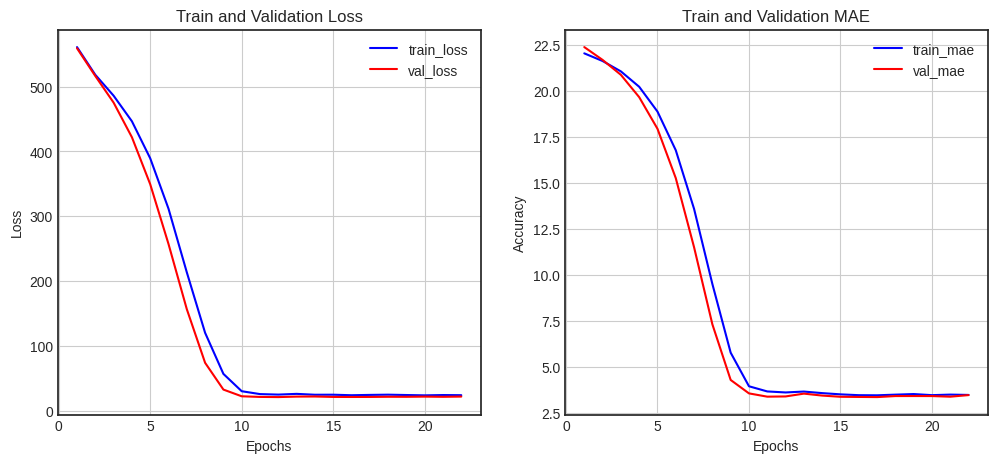

In [27]:
# Train , Val loss 시각화

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mean_absolute_error']
val_mae = history_dict['val_mean_absolute_error']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [100]:
# 모델 평가
model_boston = models.load_model('boston_regression.h5')

model_boston.evaluate(test_scaled , test_labels , verbose=1)

4/4 [==============================] - 0s 4ms/step - loss: 24.7245 - mean_absolute_error: 3.5727


[24.724523544311523, 3.5727293491363525]

4/4 [==============================] - 0s 3ms/step


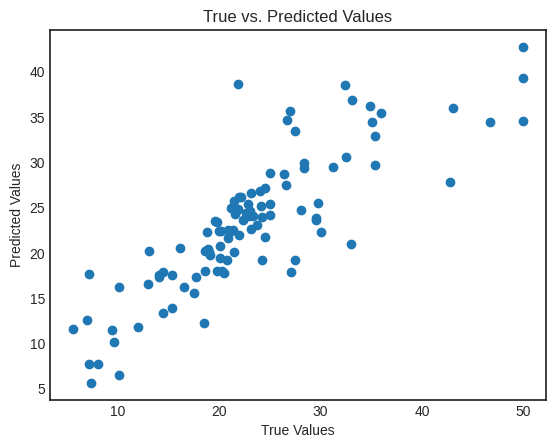

In [81]:
# 모델 예측.
pred = model_boston.predict(test_scaled)
plt.scatter(test_labels, pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

In [110]:
for i in range(10):
    print("%d 번째 테스트 데이터의 실제값: %f" % (i, test_labels[i]))
    print("%d 번째 테스트 데이터의 예측값: %f" % (i, pred[i][0]))
    print("%d 번째 테스트 데이터의 오차  : %f" % (i, test_labels[i]-pred[i][0]))
    print("")

0 번째 테스트 데이터의 실제값: 7.200000
0 번째 테스트 데이터의 예측값: 7.665055
0 번째 테스트 데이터의 오차  : -0.465055

1 번째 테스트 데이터의 실제값: 18.800000
1 번째 테스트 데이터의 예측값: 22.258524
1 번째 테스트 데이터의 오차  : -3.458524

2 번째 테스트 데이터의 실제값: 19.000000
2 번째 테스트 데이터의 예측값: 20.100286
2 번째 테스트 데이터의 오차  : -1.100286

3 번째 테스트 데이터의 실제값: 27.000000
3 번째 테스트 데이터의 예측값: 35.685528
3 번째 테스트 데이터의 오차  : -8.685528

4 번째 테스트 데이터의 실제값: 22.200000
4 번째 테스트 데이터의 예측값: 26.104677
4 번째 테스트 데이터의 오차  : -3.904677

5 번째 테스트 데이터의 실제값: 24.500000
5 번째 테스트 데이터의 예측값: 21.723299
5 번째 테스트 데이터의 오차  : 2.776701

6 번째 테스트 데이터의 실제값: 31.200000
6 번째 테스트 데이터의 예측값: 29.419649
6 번째 테스트 데이터의 오차  : 1.780351

7 번째 테스트 데이터의 실제값: 22.900000
7 번째 테스트 데이터의 예측값: 25.352678
7 번째 테스트 데이터의 오차  : -2.452678

8 번째 테스트 데이터의 실제값: 20.500000
8 번째 테스트 데이터의 예측값: 17.755424
8 번째 테스트 데이터의 오차  : 2.744576

9 번째 테스트 데이터의 실제값: 23.200000
9 번째 테스트 데이터의 예측값: 22.584681
9 번째 테스트 데이터의 오차  : 0.615319

